***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.2 The 2-Element Interferometer](4_2_The_2-element_Interferometer.ipynb)
    * Next: [4.4.1 UV Coverage: UV Tracks](4_4_1_UV_Coverage_UV_Tracks.ipynb)

***

In [14]:
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
styles = open("../style/course.css", "r").read()
HTML(styles)

Main author: Julien Girard

---
# Outline

## Section 4.3 The Visibility Function

### Intro

### 4.3.1 Mathematical definition of the complex visibility
* 4.3.1.A Specific intensity / Brigthness temperature

* 4.3.1.B Expression of the fringe pattern

* 4.3.1.C Link with the Fourier Transform

### 4.3.2 Understanding & Working with Visibility Functions


*  4.3.2.A Representation of the visibility function

*  4.3.2.B Using the visibility phase: location of the source

* 4.3.2.C Ilustration: guessing the properties of a source without imaging

___
___
___

### Intro

The visibility function is the relevant measured quantity by any interferometer. It is linked to the constrast of the fringe pattern created by the combination of the antenna signals in each baseline.

Real-life signals will suffer from (non-)instrumental and direction-(in)dependent effects which need to be corrected for to retrieve a reliable information on the sky brightness.
This can be exhaustively described by the mathematical framework of the **Radio Interferometer Measurement Equation** (RIME)[EXREF OLEG] which enables the expression of the distortions applied to the electrical fields, from their emissions to their receptions by unperfect elements of the interferometer. In this linear description, each event occuring on the signal (distortions along the direction of observation, non-uniformity of antenna elements, etc.) is modeled as a 2$\times$2 *Jones* operators which alter consecutively the signal. These Jones operators can be solved for and corrected for in the calibration step [EXREF TRIENKO].

For the sake of understanding the physical properties of the visibility function, we will take a series of assumptions to simplify the calculus.

Assuming as steady and slowly rotating sky above the interferometer, the collection of visibilities from all the baselines, is a collection of samples of the *continuous* visibility function $\mathcal{V}$. Under certain assuptions, we will see how this visibility function is related to the Fourier transform of the sky intensity distribution.


Assuming no instrumental distortion (i.e. perfectly calibrated data), we established in the previous section, a simple formula giving the contribution of all portions of the sky within $\Omega$ (and located at $\boldsymbol{\sigma}$ from the phase center) to the visibility measured $\mathcal{V}_b$ accessible with the baseline $\mathbf{b}$.

### 4.3.1 Mathematical definition of the complex visibility


#### 4.3.1.A specific intensity / surface brigthness

As seen on Chap. 1, the *specific intensity* $I_\nu$ (or the *surface brightness* $\mathcal{B}_\nu$) can be related to the received power by unit of solid angle, frequency and collecting area:
$$ dP_{\nu} = I_{\nu} d\Omega d\nu d A_{\text{eff}} $$
with $dP$ in Watt, $I_{\nu}$ in $W.m^{-2}.sr^{-1}.Hz^{-1}$

In the integrated form, the received power $P_{\text{rec}}$ from the source of flux density $S$ in the bandwidth $\Delta \nu$, flowing through a collecting area $A$ is:
$$P_{\text{rec}}=\frac{1}{2} A S \Delta \nu$$



At a location $\boldsymbol{\sigma}$ from the phase center $\mathbf{s_0}$, the portion of the sky defined by $d\Omega$ will contribute to the received power over the bandwidth $\Delta \nu$ and the collecting surface $A_{\text{eff}}$ as:
$$dP(\boldsymbol{\sigma})= \frac{1}{2} A_{\text{eff}}(\boldsymbol{\sigma})I_\nu(\boldsymbol{\sigma})\Delta\nu d\Omega$$

<div class=advice>
**Recall of definition:** <br>

- the flux density : $S_{\nu} = \int I_{\nu} d\Omega$ in Jansky (Jy)<br>
- the flux : F=$\int_{\Delta \nu} \int_\Omega I_\nu d \Omega d\nu$ in W.m$^{-2}$<br>
- the received power:  P= $\int_{A_\text{eff}}\int_{\nu} \int_\Omega I_\nu d \Omega d\nu d A_{\text{eff}}$ in W<br>
where $\Omega$ is the solid angle subtended by the source in steradians.
</div>

<div class=warn>
**Warning:** The specific intensity $I_{\nu}$ does not vary in vacuum by propagation and is independent of the distance to the source. However, the flux density $S_{\nu}$ vary with the distance as $\Omega$ as a $r^{-2}$ dependency.</div>


<div class=warn>
**Warning:** the $\frac{1}{2}$ coefficient accounts for the fact that most antenna feeds are polarized (circularly or linearly) and therefore are only sensitive to half of the power of an unpolarized source. Note that if the source and the antenna share the same polarization, the full power is measured by the antenna.</div>


We have seen that the measured quantity by an interferometer is the integral of the contribution from different portions of the sky $\Omega$. The compound complex visibility associate the measurement of the *odd* part and of the *even* part of the specific intensity $I_\nu$, modulated by the antenna response, assumed to be identical for all receivers.

$$\boxed{\boxed{\mathcal{ V_{\mathbf{b}} } = \int_{\Omega} A_\text{eff}(\boldsymbol{\sigma})I_\nu(\boldsymbol{\sigma}) e^{-\imath 2\pi \frac{\textbf{b}\cdot \boldsymbol{\sigma}}{\lambda}} d\Omega}}$$

We will use a normalized expression of the effective area to give $\mathcal{V}_{\mathbf{b}}$ the dimension of a flux density.

$$\boxed{\boxed{\mathcal{ V_{\mathbf{b}} } = \int_{\Omega}I_\nu(\boldsymbol{\sigma}) e^{-\imath 2\pi \frac{\textbf{b}\cdot \boldsymbol{\sigma}}{\lambda}} d\Omega}} \text{ in Jy}$$

#### 4.3.1.B Expression of the fringe pattern


In section 4.1, we defined various coordinates systems to represent the baseline in a sky-friendly frame. We will now use them to have an explicit expression of the visibility $\mathcal{V}_{\mathbf{b}}$.


$\boldsymbol{\sigma}$ is the direction difference vector defined as $\boldsymbol{\sigma}= \mathbf{s} - \mathbf{s_0}$.

In the ($u$,$v$,$w$) coordinate system, we have

\begin{eqnarray}
\mathbf{s_0}&=&
\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}
\end{eqnarray}

\begin{eqnarray}
\mathbf{s} 
&=&
\begin{pmatrix}
l \\
m \\
n \\
\end{pmatrix}
\end{eqnarray}

\begin{eqnarray}
\mathbf{b}_{\lambda} 
&=&
\mathbf{ \frac{\mathbf{b}}{\lambda}}
=
\begin{pmatrix}
u \\
v \\
w \\
\end{pmatrix}
\end{eqnarray}


The scalar product $\mathbf{b} \cdot \boldsymbol{\sigma}$ can therefore be expressed as a function of ($u$,$v$,$w$) and ($l$,$m$,$n$):


$$ \mathbf{b_\lambda} \cdot \boldsymbol{\sigma}= ul + vm + (n-1)w $$

We will describe the quantity $d\Omega$ in term of ($l$,$m$,$n$) coordinates. This quantity describes an element of solid angle on the celestial sphere.
As $d \Omega = d\theta \sin \theta d\phi$, we may also express the surface element in terms of ($l$,$m$,$n$). By computing the Jacobian determinent (See Appendix A...) [INREF], we end up with:

$$d \Omega = \frac{dl dm}{n} = \frac{dl dm}{\sqrt{1 - l^2 - m^2}}$$

$$\boxed{\boxed{\mathcal{ V }(u,v,w) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} A(l,m)I_\nu(l,m) \exp \left[ {-\imath 2\pi (ul+vm+w(\sqrt{1-l^2-m^2}-1)) }\right] \frac{dl dm}{\sqrt{1 - l^2 - m^2}}}}$$

<div class=warn>
**Warning:** The bounds of the integral can be infinite as we know that the integrand in bounded ($A$ and $I_\nu$ are null when $l^2+m^2 \geq 1$).</div>


If the following conditions are met:

- the field of view $\Omega$ is small
- the beam pattern $A(l,m)$ goes quickly to zero
- the source are grouped close to the phase center at (l=0,m=0)
- w is small

i.e.  $l,m << 1$
then we can take simplify the expression of $\mathcal{V}$ by keeping the first order development of the argument of the exponential:

$w(\sqrt{1-l^2-m^2}-1) \sim -\frac{1}{2}(l^2+m^2) \sim \mathcal{O}(l,m) $

The integral becomes:


$$ \mathcal{V}(u,v,w \sim 0) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \frac{A(l,m) I_\nu (l,m)}{\sqrt{1 - l^2 - m^2}}  e^{ -\imath 2\pi (ul+vm)}dl dm$$


#### 4.3.1.C Link with the Fourier Transform

The Eq. is no longer a function of $w$, and it now takes the shape of a 2-D Fourier transform (see Chap 2.) with (u,v) being the fourier pairs of (l,m).

The inverse transform can be written:

$$ \frac{A(l,m) I_\nu}{\sqrt{1 - l^2 - m^2}} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \mathcal{V}(u,v) e^{ +\imath 2\pi (ul+vm)}du dv$$

We will come back to the consequences of this form later, in section 4.5.(INREF  Van CITTERT-ZERNIKE).

### 4.3.2 Understanding the visibility function

####  4.3.2.A Representations of the visibility function

The Fourier relationship existing between $I_\nu$ and $\mathcal{V}$ if of primary interest as it is the latter that is sampled by an interferometer. The interferometer is not sensitive to the sky but to the Fourier transform of the sky.
To recover some knowledge of the sky through $I_\nu$, one needs to understand the general shape of the visibility function.
We will consider it as a continuous complex function.

$\mathcal{V}_\nu$ is a 2D function lying in the Fourier space. At a time $t$ and frequency $\nu$, one baseline and one direction $\mathbf{s_0}$, will provide a unique ($u$,$v$) point in the fourier space, which corresponds to one complex sample of the visibility function.

In the earlier days of interferometry, only few samples where available and the inspection of the samples in a 2D plane was unpractical. We usually inspect the amplitude of the visibility samples as a function of the *uv distance* $r_{uv}$ defined:

$ r_{uv} = \sqrt{u^2+v^2}$


Instead of exploiting the FT properties linking the visibility function to the brightness distribution, we will simply approach this integral on a simple case.

The FT will be used in the next chapter for imaging.

#### interpretation of the integral as a spatial filtering

The visibility is expressed as the integral of the intensity distribution with a complex exponential which is the Fourier kernel. Using a vector definition of the intensity distribution as a function of direction, this integral can be interpreted as the scalar product between the intensity distribution vector, and the Fourier basis kernel function:

$$ \mathcal{V}= \langle \mathbf{I_\nu} \cdot \mathbf{f}_{u,v}^{l,m}\rangle$$ with $\mathbf{f}_{u,v}^{l,m}= e^{-2j\pi (ul+vm)}$

This can be seen as the projection of $\mathbf{I_\nu}$ on the basis vector $\mathbf{f}_{u,v}^{l,m}$. The complex visibility of the baseline with $u$,$v$ coordinates, is therefore the coefficient of the intensity distribution of the the basis Fourier vector of Fourier of frequency ($u$,$v$). This operation therefore filters the magnitude of spatial frequency ($u$,$v$) contained in the intensity distribution.

The Fourier vector can be seen as a fringe pattern projected on the sky (**Figure 1**), through which the content of the sky is seen.

<img src='figures/uvfreq.png' width=50%>

<div align="center">**Figure 1**: a single spatial frequency located at ($u$,$v$) and its associated fringe pattern on the sky<br>
</div>

##### 4.3.2.B Using the visibility amplitude: shape of the source

Consider a 2-element interferometer projecting a baseline ($u$,$v=0$,$w=0$) associated with a set of fringes along the $m$ axis (for simplification). This is possible with a East-West baseline (see section 4.4). 

This interferometer will observe instantaneously a single extended source (represented by a disk of unit brigthness) at the phase center and during the transit.

We assume that the sky is only composed of this source, that the effect of the antenna pattern is negligible and that $w=0$.

The integral of Eq. therefore reduces to computing the integral of the fringe pattern over the source:
$$ \mathcal{V} = \int_{\text{disk}} e^{-2j\pi ul}dl$$


In [25]:
# 1 East-West baseline observing a disk at the phase center
from matplotlib.patches import Circle
def plotfringe(u=4,rad=0.2):
    global radius
    radius=rad
    # preparing (l,m,n) space
    Npointsl=1001
    ll=np.linspace(-1.,1.,Npointsl)
    l,m=np.meshgrid(ll,ll)

    # Definition of the disk
    #radius=0.1234 # angular radius of the object in l,m coordinates

    # projected baseline length on the u axis
    #u=4

    # generate fringe pattern
    tabcos=np.real(np.exp(-2j*np.pi*u*l))

    # plotting the fringe pattern and the source
    pxrad=radius*Npointsl/2
    circle=Circle((500,500),pxrad,color='r',alpha=0.5,fill=True)
    fig,ax =plt.subplots(figsize=(6,6))
    im=plt.imshow(np.abs(tabcos),interpolation=None,cmap="winter")
    ax.add_patch(circle)
    #center=l[(Npoints-1)/2,(Npoints-1)/2]

    # Compute the absolute value of the integral of the fringe over the source
    w=np.where(np.sqrt(l**2+m**2) <= radius)
    integral=np.sum(tabcos[w])
    print "Integral="+str(integral)


Integral=12341.4705686


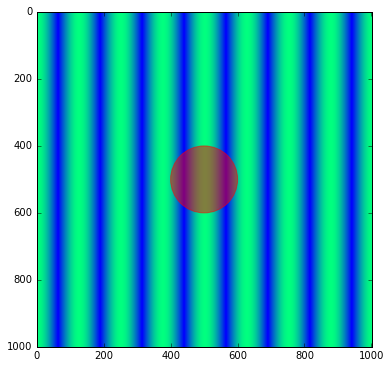

In [26]:
plotfringe(u=2,rad=0.2)

The source is represented with the red circle on top of which the fringe pattern is super imposed. We see that an uneven fraction of the bright fringes is crossing the source. The resulting integral is positive in this case. Let's try to increase the projected baseline size by increasing the value of $u$.

Integral=-2140.96170232


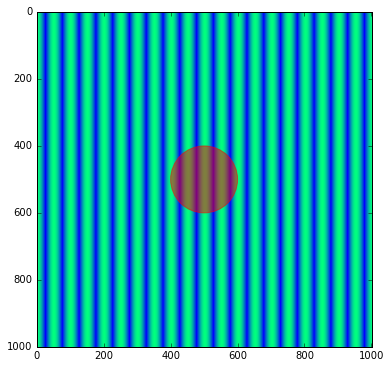

In [27]:
plotfringe(u=5,rad=0.2)

In this case, the absolute value of the integral is $\sim$10 times lower than before, suggesting a more balanced contribution of dark and white fringes to the integral. The latter being slightly dominated by the dark fringes.

We can understand that, as the width of the fringes decreases, the integral will ultimately converge towards 0. Indeed the probability of evenly covering the source with the same fraction of bright and dark fringes increases.

Let's focus on the variation of the absolute value of the integral, as a function of increasing $u$.

In [29]:
def plotintegral(UMAX=15):
    %matplotlib inline
    global u
    from matplotlib.patches import Circle

    #UMAX=5. # adjust it to larger values if no zeroes is encountered in next plot

    Npointsl=1001
    Npointsu=500
    ll=np.linspace(-1.,1.,Npointsl)
    l,m=np.meshgrid(ll,ll)
    u=np.arange(Npointsu)*UMAX*1./Npointsu
    w=np.where(np.sqrt(l**2+m**2) <= radius)
    
    integral=np.array([])
    for du in u:
        tabcos=np.real(np.exp(2j*np.pi*du*l))
        integral=np.append(integral,np.abs(np.sum(tabcos[w])))

    normintegral=integral/np.max(integral)
    plt.xlabel('Spatial frequency')
    plt.ylabel('Normalized integral over source')
    plt.plot(u,normintegral,".-")
    return normintegral


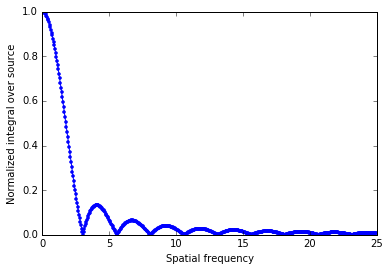

In [30]:
integral=plotintegral(UMAX=25.)

From $u=0$ to $u=25$, we can notice that the integral is close to zero at specific values of $u$ (denoted $u_\text{min}^{(n)}$). This corresponds to the fringe spacing where the integral of the source over the dark fringes is equal to the integral over the bright fringes.

Namely, when

$$ \int_{\text{bright }\cap\text{ source}} e^{-2j\pi ul}dl \approx \int_{\text{dark }\cap\text{ source}} e^{-2j\pi ul}dl$$

A null of the integral (i.e. of the visibility function) corresponds to the case where the contrast of the fringe (over the source) is zero. In this particular case, we say that the source is *resolved*.
The first value $u_\text{min}^{(1)}$, where the integral is minimum, has therefore a strong relationship with the geometry of the source we are observing.

Let's determine an approximate value $u_\text{min}^{(1)}$.

In [31]:
def findumin(normintegral,ulim=5):############
    # Adjust ulim to search for the first minimum of the integral
    # 
    #ulim=5 # should be an value larger than the first minimum
    wloc=np.where(u <= ulim)
    ############

    locmin=np.where(normintegral[0:wloc[0][-1]] == np.min(normintegral[0:wloc[0][-1]]))
    print "Index first minimum = "+str(locmin[0][0])
    print "Normalized integral value at first min = "+str(normintegral[locmin][0])
    print "Spatial frequency at first min = "+str(u[locmin][0])

    umin=u[locmin][0]

    deltal=1.22/(2*umin) # Bessel function :  J1(3.83)=0=J1(2*pi*f*r)
    print
    print "Spatial scale at first min = "+str(deltal)
    print "True object radius = "+str(radius)

In [32]:
findumin(integral,ulim=5)

Index first minimum = 61
Normalized integral value at first min = 0.000554288516599
Spatial frequency at first min = 3.05

Spatial scale at first min = 0.2
True object radius = 0.2


We identified the value of $u_\text{min}^{1}$ to be 3.05.
As the object is a disk, its visibility function will be described by the first order Bessel function $\mathcal{J}_1$.
We know that $\mathcal{J}_1(2\pi u l)=\mathcal{J}_1(3.8317) \approx 0$.
We encounter a first null when:

\begin{eqnarray}
2 \pi u l &\approx& 3.8317 \\
l&\approx&\frac{1.22}{2 u} \\
l&\approx&0.2
\end{eqnarray}

As we set in this example, the *true* object radius in unit of $l$ was 0.2.

With this small example, your performed the measurement of the radius of an object along the projected baseline. If you were observing a remote star with a sufficiently good system and a relatively long baseline at a short wavelength, you would be able to measure the radius of this star, without any imaging.

This example illustrate how interferometrists were (and still are!) able to resolve far-away objects with high angular resolution by combining the signals from low-angular resolutions instruments.

Let's move on to use of the visibility to determine the location of the source.

##### 4.3.2.C Using the visibility phase: location of the source

##### 4.3.2.C.1 Transiting source

In order to reduce the effect of the bandwidth on the fringe (i.e. causing the fringe pattern to be tampered by an sinc), the interferometer compensates for the delay $\tau$ by inserting a supplementary delay $\tau_c$ resulting in the shifting of center of the fringe pattern in the sky to follow the direction of the phase center.

Let's remove this tracking for the moment and let's assume that the phase center is directed towards a constant direction in local coordinates ($A$,$E$) (e.g. toward the South, as some elevation).
A source on the celestial sphere will cross the projected fringe pattern and will create a variation in the interferometer response as the source will pass in bright and dark fringes.




MISSING PART

##### 4.3.2.C.2 Fringe rate mapping

A technique, called *fringe rate mapping* (EX KOGAN) exploit the information of the fringe rate offset compared to that of the phase center.
In a two-dimensional reference frame, the fringe rate offset can be writtent as:

$$ \omega_{frm}= 2\pi (\frac{du}{dt}l+\frac{dv}{dt}m)$$

where ($u$,$v$) are the coordinate of the projected baseline and ($l$,$m$) the direction cosine coordinates from the phase center.


Eq. is an equation of a straight line in the of the from $m=f(l)$.

Each baseline produce a set of fringes on the sky. This set of fringes rotates on the sky (as a result of the rotation of the baseline as seen from the source) and each source will modulate the visibility depending on its distance to the phase center. Far away sources will have a faster fringe rate contribution to the visibilities.

If the sky is composed of only one source at an unknown position, the visibility amplitude will have a periodic behavior given the fringe rate.

If we can measure the periodic behavior in the visibility plane as a function of time (i.e. measuring $\frac{du}{dt}$ and $\frac{dv}{dt}$) we can then draw the straight line $m=f(l)$, giving all the locii where the source can be to produce the same observed fringe rate.

If we have a second baseline, giving another measure of the visibility as a function of time, we will measure different ($\frac{du}{dt}$,$\frac{dv}{dt}$) giving another equation of a straight line. 

The intersection of the two line gives the locus of the source responsible for the variation.

If we have multiple bright source, one must study the main peaks in the spectrum of the visibility (by taking the FFT of the visibility with time) and derive a line for each peak.

Ultimately, the collection of straight line equation can help locate (in the l,m plane) the main sources without having to image the source.

DrawMS/FRMAP/Aips principle? Astrometry of a source with different baselines, ref: [link](http://adsabs.harvard.edu/full/1996ASPC..101..175K)

EXAMPLE !

Now that the properties of the visibility function have been described, we will address the sampling of the visibility function by focusing on the variation of the measured ($u$,$v$,$w$) frequency, as a function of instrumental and observational parameters.

<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>
  
&bull; The visibility function reduces to the **2D Fourier transform** of the intensity distribution under simplyfing assuptions.<br>
&bull; The visibility integral at ($u$,$v$) can be seen as an operator which returns the **coefficient of the spatial frequency** ($u$,$v$).<br>
&bull; By studying the properties of this integral, one can derive the **angular size and position** of a source without imaging.
</p>

---
* [Go back up](#beginning) <!--\ref{beginning}--> 
* Or continue to next section: [4.4.1 UV Coverage: UV Tracks -->](4_4_1_UV_Coverage_UV_Tracks.ipynb)
---